In [ ]:
!pip install pyngrok
!pip install  mlflow
!pip install gradio

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass
from mlflow.models import infer_signature

## Connect to the mlflow server

In [ ]:
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

In [ ]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)
mlflow.set_experiment("Space_Y_models")

<Experiment: artifact_location='/content/mlruns/1', creation_time=1729351939432, experiment_id='1', last_update_time=1729351939432, lifecycle_stage='active', name='Space_Y_models', tags={}>

## note to connect to the mlflow you have to
1. have a token from ngrok after making an account on that website which can be found in the link in the cell below
2.  after getting it paste it in the input textbox and and click on the fisrt link appear so it opens the mlflow server
3. then click enter in the textbox to continue running the notebook as we have to connect to the server first.
## if you dont want to use mlflow just comment the cell and the funtion log_model_to_mlflow   

In [ ]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/signup")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')
input("Resume. ?  : ")

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/signup
··········
 * ngrok tunnel "https://c561-34-23-123-13.ngrok-free.app" -> "http://127.0.0.1:5000"
Resume. ?  : 


''

In [ ]:
falcon9_data = pd.read_csv('launches_data_ML.csv')
falcon9_data.head()

,Flight_Number,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,...,B1060,B1062,CCSFS SLC 40,VAFB SLC 4E,KSC LC 39A,JRTI-1,OCISLY,LZ-1,JRTI,LZ-4
0,14,2395.0,1,1,0,1,1.0,0,-80.577366,28.561857,...,0,0,1,0,0,1,0,0,0,0
1,17,1898.0,1,1,0,1,1.0,0,-80.577366,28.561857,...,0,0,1,0,0,1,0,0,0,0
2,19,2477.0,1,1,0,1,1.0,0,-80.577366,28.561857,...,0,0,1,0,0,0,1,0,0,0
3,20,2034.0,1,1,0,1,1.0,0,-80.577366,28.561857,...,0,0,1,0,0,0,0,1,0,0
4,21,553.0,1,1,0,1,1.0,0,-120.610829,34.632093,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
falcon9_data.shape

(67, 87)


## Splitting Data into input and output

In [ ]:
y=falcon9_data['Class'].to_numpy()
y

array([0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [ ]:
X = falcon9_data.drop(columns = ["Class","Flight_Number"])
X.head()

,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,LEO,...,B1060,B1062,CCSFS SLC 40,VAFB SLC 4E,KSC LC 39A,JRTI-1,OCISLY,LZ-1,JRTI,LZ-4
0,2395.0,1,1,0,1,1.0,0,-80.577366,28.561857,0,...,0,0,1,0,0,1,0,0,0,0
1,1898.0,1,1,0,1,1.0,0,-80.577366,28.561857,0,...,0,0,1,0,0,1,0,0,0,0
2,2477.0,1,1,0,1,1.0,0,-80.577366,28.561857,0,...,0,0,1,0,0,0,1,0,0,0
3,2034.0,1,1,0,1,1.0,0,-80.577366,28.561857,1,...,0,0,1,0,0,0,0,1,0,0
4,553.0,1,1,0,1,1.0,0,-120.610829,34.632093,0,...,0,0,0,1,0,0,0,0,1,0


In [ ]:
X.columns

Index(['PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block',
       'ReusedCount', 'Longitude', 'Latitude', 'LEO', 'ISS', 'PO', 'GTO',
       'ES-L1', 'SSO', 'HEO', 'MEO', 'VLEO', 'SO', 'GEO', 'B0003', 'B0004',
       'B0005', 'B0006', 'B0007', 'B1003', 'B1004', 'B1005', 'B1006', 'B1007',
       'B1008', 'B1011', 'B1010', 'B1012', 'B1013', 'B1014', 'B1015', 'B1016',
       'B1018', 'B1019', 'B1017', 'B1020', 'B1021', 'B1022', 'B1023', 'B1024',
       'B1025', 'B1026', 'B1028', 'B1029', 'B1031', 'B1030', 'B1032', 'B1034',
       'B1035', 'B1036', 'B1037', 'B1039', 'B1038', 'B1040', 'B1041', 'B1042',
       'B1043', 'B1044', 'B1045', 'B1046', 'B1047', 'B1048', 'B1049', 'B1050',
       'B1054', 'B1051', 'B1056', 'B1059', 'B1058', 'B1060', 'B1062',
       'CCSFS SLC 40', 'VAFB SLC 4E', 'KSC LC 39A', 'JRTI-1', 'OCISLY', 'LZ-1',
       'JRTI', 'LZ-4'],
      dtype='object')

### Normalization

In [ ]:
transform = preprocessing.StandardScaler()
X=transform.fit_transform(X)
X

array([[-0.87901867, -0.72707687,  0.        , ..., -0.49065338,
        -0.46709937, -0.1754116 ],
       [-0.97517518, -0.72707687,  0.        , ..., -0.49065338,
        -0.46709937, -0.1754116 ],
       [-0.86315381, -0.72707687,  0.        , ..., -0.49065338,
        -0.46709937, -0.1754116 ],
       ...,
       [ 1.67580365,  2.96338907,  0.        , ..., -0.49065338,
        -0.46709937, -0.1754116 ],
       [ 1.67580365,  0.7491095 ,  0.        , ..., -0.49065338,
         2.1408721 , -0.1754116 ],
       [-0.63021129, -0.72707687,  0.        , ..., -0.49065338,
        -0.46709937, -0.1754116 ]])

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=2)

# Since this is a classification problem we can use the following algorithms
* Logistic Regression
* Support Vector Machine
* Decision Tree Clasifier
* K-nearest neighbour
## and we can use gridsearchCV to compare these different algorithme and fine tune the hyper parameters






# some code will be used repeately so made function instead

In [ ]:
def log_model_to_mlflow(model, metrics, registered_model_name):
    # Start an MLflow run
    with mlflow.start_run(run_name=registered_model_name):

        # Log hyperparameters
        for param_name, param_value in model.best_params_.items():
            mlflow.log_param(param_name, param_value)

        # Log metrics
        for metric_name, metric_value in metrics.items():
            mlflow.log_metric(metric_name, metric_value)

        # Infer the model signature
        signature = infer_signature(X_train, model.predict(X_train))

        # Log the model
        model_info = mlflow.sklearn.log_model(
            sk_model=model,
            artifact_path="",
            signature=signature,
            input_example=X_train,
            registered_model_name=registered_model_name,
        )

In [ ]:
def calculate_metrics(y_test, y_pred,model):
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    test_accuracy = accuracy_score(y_test, y_pred)
    print("Tuned hyperparameters (best parameters):", model.best_params_)
    print("Training accuracy:", model.best_score_)
    print(f"Testing accuracy: {test_accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    return {
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "test_accuracy": test_accuracy,
    }

In [ ]:
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
              xticklabels=['didnt land', 'landed'],
              yticklabels=['didnt land', 'landed'])
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title('Confusion Matrix')
  plt.show()


## Now We will start with Logistic Regression

*  setting the learning rate  ["solver"]
*  setting regularaization values ["C"]
*  setting regularization value["penalty"]

In [ ]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l1','l2'],
             'solver':['lbfgs']}

In [ ]:
landing_model_LR = LogisticRegression()

In [ ]:
landing_model_LR = GridSearchCV(landing_model_LR, param_grid=parameters, cv=10)

* training the model

In [ ]:
landing_model_LR.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *ar

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs']})

* Evaluation

In [ ]:
y_pred = landing_model_LR.predict(X_test)

In [ ]:
metrics = calculate_metrics(y_test, y_pred,landing_model_LR)

Tuned hyperparameters (best parameters): {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
Training accuracy: 0.85
Testing accuracy: 0.86
Precision: 0.86
Recall: 1.00
F1 Score: 0.92


In [ ]:
log_model_to_mlflow(landing_model_LR ,metrics,"Logistic Regreesion model" )

Successfully registered model 'Logistic Regreesion model'.
Created version '1' of model 'Logistic Regreesion model'.


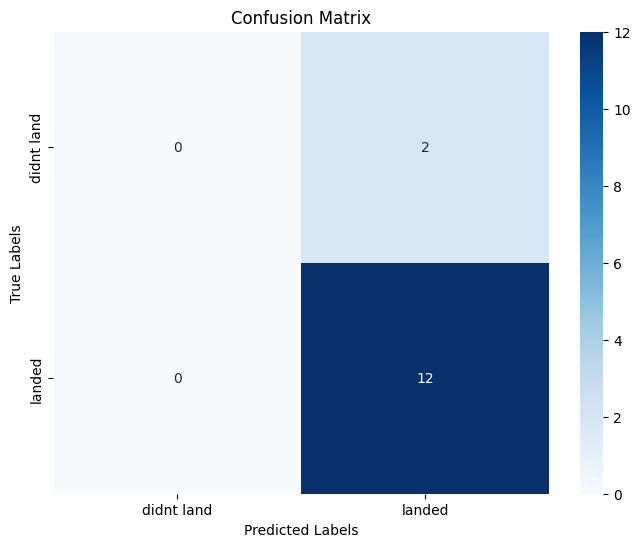

In [ ]:
plot_confusion_matrix(y_test, y_pred)

* this means that is model is very good at predicting the landing cases(TN) but failed to identify the non land cases(TP)

# Support Vector Machine Algo



*   Setting some parameters like kernel for higher dimensional spaces
 , C(Regularization) for overcomming overfitting
 , gamma how strongly a data point can determine the decision boundry



In [ ]:
parameters = {'kernel':('linear', 'rbf','poly', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

In [ ]:
landing_model_svm = SVC()

### Training the model

In [ ]:
landing_model_svm=GridSearchCV(landing_model_svm, parameters, cv=10)
landing_model_svm.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')})

### Evaluation

In [ ]:
y_pred = landing_model_svm.predict(X_test)

In [ ]:
metrics = calculate_metrics(y_test, y_pred,landing_model_svm)

Tuned hyperparameters (best parameters): {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Training accuracy: 0.85
Testing accuracy: 0.86
Precision: 0.86
Recall: 1.00
F1 Score: 0.92


In [ ]:
log_model_to_mlflow(landing_model_svm ,metrics,"SVM model" )

Successfully registered model 'SVM model'.
Created version '1' of model 'SVM model'.


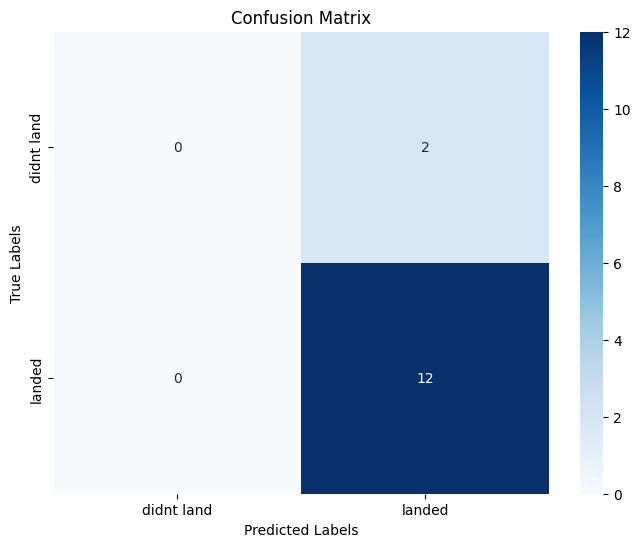

In [ ]:
plot_confusion_matrix(y_test, y_pred)

## same result

##  Let's Try Decision Tree Classifier

### we have some parmeters like
* criterion :  which measure the quality of split
* splitter :  which means  which feature to split on at each node
* max_depth :  for controlling the depth for the tree ,
* max_features :  The maximum number of features to consider when looking for the best split.
* min_sample_leaf : minimum samples needed for the leaf
* min_sample_split : min number of sample for splitting

In [ ]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

## Model Creation

In [ ]:
landing_model_DT =  DecisionTreeClassifier()

## Trainig the model

In [ ]:
landing_model_DT=GridSearchCV(landing_model_DT, parameters, cv=10)
landing_model_DT.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

## Evaluation

In [ ]:
y_pred = landing_model_DT.predict(X_test)

In [ ]:
metrics = calculate_metrics(y_test, y_pred,landing_model_DT)

Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}
Training accuracy: 0.9066666666666668
Testing accuracy: 0.86
Precision: 1.00
Recall: 0.83
F1 Score: 0.91


In [ ]:
log_model_to_mlflow(landing_model_DT ,metrics,"DT model" )

Successfully registered model 'DT model'.
Created version '1' of model 'DT model'.


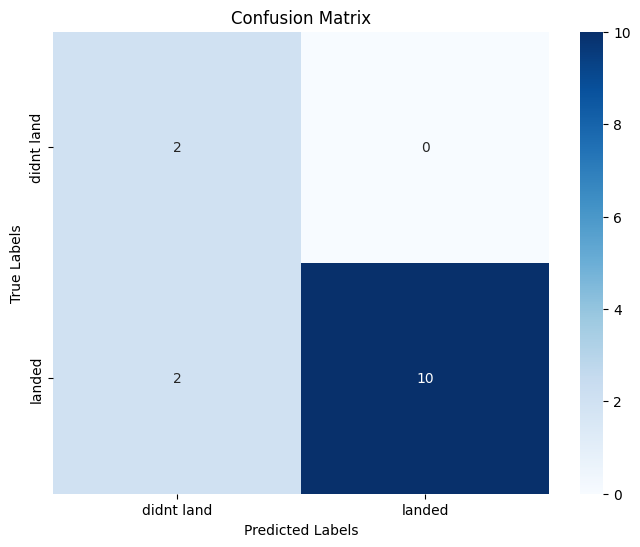

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
# pip install joblib

In [ ]:
import joblib
# Save the model to a file
# joblib.dump(landing_model_DT, 'landing_model_DT.pkl')
# Load the saved model from the file
# loaded_model = joblib.load('landing_model_DT.pkl')

## Let's Try KNN

### Setting the parameters
* n_neighbors: Number of neighbors to consider for predictions.
* algorithm: Method to compute nearest neighbors.
* p: Distance metric (1 for Manhattan, 2 for Euclidean).



In [ ]:
parameters = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

In [ ]:
landing_model_KNN = KNeighborsClassifier()

In [ ]:
landing_model_KNN=GridSearchCV(landing_model_KNN, parameters, cv=10)

In [ ]:
landing_model_KNN.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [ ]:
y_pred = landing_model_KNN.predict(X_test)

In [ ]:
metrics = calculate_metrics(y_test, y_pred,landing_model_KNN)

Tuned hyperparameters (best parameters): {'algorithm': 'auto', 'n_neighbors': 3, 'p': 2}
Training accuracy: 0.85
Testing accuracy: 0.86
Precision: 0.86
Recall: 1.00
F1 Score: 0.92


In [ ]:
log_model_to_mlflow(landing_model_KNN ,metrics,"KNN model" )

Successfully registered model 'KNN model'.
Created version '1' of model 'KNN model'.


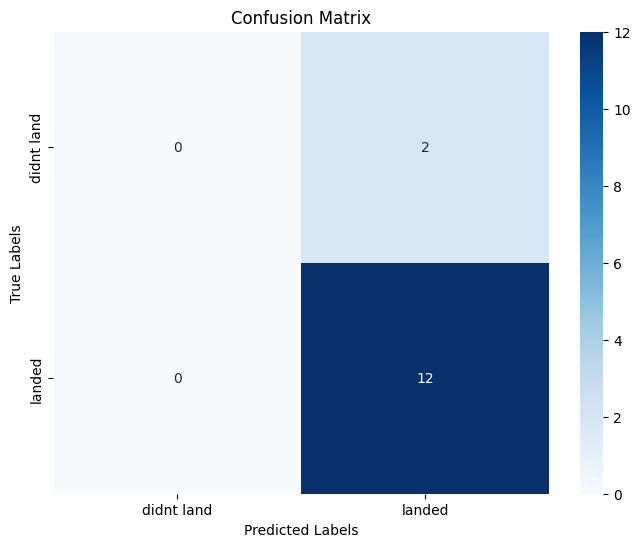

In [ ]:
plot_confusion_matrix(y_test, y_pred)

## Let's Try Random Forest

In [ ]:
parameters = {
    'criterion': ['gini'],  # Start with one criterion
    'max_depth': [10, 15],  # Fewer max depth options
    'n_estimators': [100],   # Start with one number of trees
    'max_features': ['sqrt'], # Use just one option
    'min_samples_leaf': [1], # One option
    'min_samples_split': [2], # One option
}


## Ceate the model

In [ ]:
landing_model_RF = RandomForestClassifier()

In [ ]:
landing_model_RF= GridSearchCV(landing_model_RF, parameters, cv=10)

## Train the model

In [ ]:
landing_model_RF.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  warnings.warn(


GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [10, 15],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [2], 'n_estimators': [100]})

## Evaluation

In [ ]:
y_pred = landing_model_RF.predict(X_test)

In [ ]:
metrics = calculate_metrics(y_test, y_pred,landing_model_RF)

Tuned hyperparameters (best parameters): {'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Training accuracy: 0.8100000000000002
Testing accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


In [ ]:
log_model_to_mlflow(landing_model_RF,metrics,"RF model" )

Successfully registered model 'RF model'.
Created version '1' of model 'RF model'.


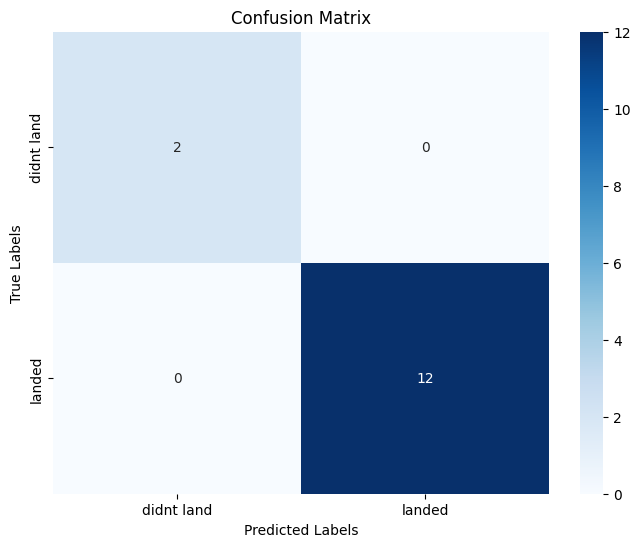

In [ ]:
plot_confusion_matrix(y_test, y_pred)

In [ ]:
y_test,y_pred

(array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]),
 array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]))

# let's make our UI using Gradio
## since our inputs are a lot we can categorize them in 5 categories(tabs)
## Basic flight info : payloadmass , number of flughts
## Rocket Features : griffins , legs,reused , reused count
## Launch and Lading info : longitude , latitude, launchsize,LandingPad
## Orbital info : orbit
## Booster serial nuber : serial

## Note : Take care of 3 things
1. the format of the input data for the user interface
2. dont forget to normalize your data if you did so before when training the input
3. the order of which you enter the input to the model

In [ ]:
import numpy as np

def predict_landing(PayloadMass, Flights, GridFins, Reused, Legs, Block, ReusedCount,
                    Longitude, Latitude, launch_site, landing_pad, orbit, booster_serial):

    # Define categorical feature options
    launch_sites = ["CCSFS SLC 40", "VAFB SLC 4E", "KSC LC 39A"]
    landing_pads = ["JRTI-1", "OCISLY", "LZ-1", "JRTI", "LZ-4"]
    orbits = ["LEO", "ISS", "PO", "GTO", "ES-L1", "SSO", "HEO", "MEO", "VLEO", "SO", "GEO"]
    booster_serials = [
        'B0003', 'B0004', 'B0005', 'B0006', 'B0007', 'B1003', 'B1004', 'B1005',
        'B1006', 'B1007', 'B1008', 'B1011', 'B1010', 'B1012', 'B1013', 'B1014',
        'B1015', 'B1016', 'B1018', 'B1019', 'B1017', 'B1020', 'B1021', 'B1022',
        'B1023', 'B1024', 'B1025', 'B1026', 'B1028', 'B1029', 'B1031', 'B1030',
        'B1032', 'B1034', 'B1035', 'B1036', 'B1037', 'B1039', 'B1038', 'B1040',
        'B1041', 'B1042', 'B1043', 'B1044', 'B1045', 'B1046', 'B1047', 'B1048',
        'B1049', 'B1050', 'B1054', 'B1051', 'B1056', 'B1059', 'B1058', 'B1060',
        'B1062'
    ]

    # Create one-hot encoding for launch_site
    launch_site_array = np.zeros(len(launch_sites))
    if launch_site in launch_sites:
        index = launch_sites.index(launch_site)
        launch_site_array[index] = 1

    # Create one-hot encoding for landing_pad
    landing_pad_array = np.zeros(len(landing_pads))
    if landing_pad in landing_pads:
        index = landing_pads.index(landing_pad)
        landing_pad_array[index] = 1

    # Create one-hot encoding for orbit
    orbit_array = np.zeros(len(orbits))
    if orbit in orbits:
        index = orbits.index(orbit)
        orbit_array[index] = 1

    # Create one-hot encoding for booster_serial
    booster_array = np.zeros(len(booster_serials))
    if booster_serial in booster_serials:
        index = booster_serials.index(booster_serial)
        booster_array[index] = 1

    # Prepare the input array
    inputs_array = np.array([[PayloadMass, Flights, GridFins, Reused, Legs, Block, ReusedCount,
                               Longitude, Latitude] +list(orbit_array) + list(booster_array)
                              + list(launch_site_array) +
                               list(landing_pad_array)
                                ])
    print(inputs_array)

    inputs_array_scaled = transform.transform(inputs_array)  # Use the fitted scaler
    # Make prediction
    prediction = landing_model_RF.predict(inputs_array_scaled)  # Your model prediction
    return "Will Land" if prediction == 1 else "Will Not Land"


In [ ]:
import gradio as gr

with gr.Blocks() as demo:

    # Basic Flight Info Tab
    with gr.Tab("Basic Flight Info"):
        payload_mass = gr.Number(label="Payload Mass (kg)", minimum=0)  # Prevent negative inputs
        flights = gr.Number(label="Number of Flights", minimum=0)  # Prevent negative inputs

    # Rocket Features Tab
    with gr.Tab("Rocket Features"):
        grid_fins = gr.Checkbox(label="Grid Fins")
        reused = gr.Checkbox(label="Reused")
        legs = gr.Checkbox(label="Legs")
        block = gr.Number(label="Block (1-5)", value=1, minimum=1, maximum=5)  # Restrict input to 1-5
        reused_count = gr.Number(label="Reused Count", minimum=0)  # Prevent negative inputs

    # Launch and Landing Info Tab
    with gr.Tab("Launch and Landing Info"):
        longitude = gr.Number(label="Longitude", minimum=-180, maximum=180)  # Valid range for longitude
        latitude = gr.Number(label="Latitude", minimum=-90, maximum=90)  # Valid range for latitude
        launch_site = gr.Dropdown(choices=["CCSFS SLC 40", "VAFB SLC 4E", "KSC LC 39A"], label="Launch Site")
        landing_pad = gr.Dropdown(choices=["JRTI-1", "OCISLY", "LZ-1", "JRTI", "LZ-4"], label="Landing Pad")

    # Orbital Info Tab
    with gr.Tab("Orbital Info"):
        orbit = gr.Dropdown(choices=["LEO", "ISS", "PO", "GTO", "ES-L1", "SSO", "HEO", "MEO", "VLEO", "SO", "GEO"], label="Orbit")

    # Booster Serial Numbers Tab
    with gr.Tab("Booster Serial Numbers"):
        booster_serial = gr.Dropdown(choices=[
            'B0003', 'B0004', 'B0005', 'B0006', 'B0007', 'B1003', 'B1004', 'B1005', 'B1006',
            'B1007', 'B1008', 'B1011', 'B1010', 'B1012', 'B1013', 'B1014', 'B1015', 'B1016',
            'B1018', 'B1019', 'B1017', 'B1020', 'B1021', 'B1022', 'B1023', 'B1024', 'B1025',
            'B1026', 'B1028', 'B1029', 'B1031', 'B1030', 'B1032', 'B1034', 'B1035', 'B1036',
            'B1037', 'B1039', 'B1038', 'B1040', 'B1041', 'B1042', 'B1043', 'B1044', 'B1045',
            'B1046', 'B1047', 'B1048', 'B1049', 'B1050', 'B1054', 'B1051', 'B1056', 'B1059',
            'B1058', 'B1060', 'B1062'
        ], label="Booster Serial")

    # Prediction Output
    output = gr.Textbox(label="Prediction")

    # Submit Button and Function Call
    submit_button = gr.Button("Submit").click(
        predict_landing,
        inputs=[
            payload_mass, flights, grid_fins, reused, legs, block, reused_count,
            longitude, latitude, launch_site, landing_pad, orbit, booster_serial
        ],
        outputs=output
    )

# Launch the Gradio app
demo.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://dc33053ca7745360fe.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
falcon9_data.head()

,Flight_Number,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Longitude,Latitude,Class,LEO,ISS,PO,GTO,ES-L1,SSO,HEO,MEO,VLEO,SO,GEO,B0003,B0004,B0005,B0006,B0007,B1003,B1004,B1005,B1006,B1007,B1008,B1011,B1010,B1012,B1013,B1014,B1015,B1016,B1018,B1019,B1017,B1020,B1021,B1022,B1023,B1024,B1025,B1026,B1028,B1029,B1031,B1030,B1032,B1034,B1035,B1036,B1037,B1039,B1038,B1040,B1041,B1042,B1043,B1044,B1045,B1046,B1047,B1048,B1049,B1050,B1054,B1051,B1056,B1059,B1058,B1060,B1062,CCSFS SLC 40,VAFB SLC 4E,KSC LC 39A,JRTI-1,OCISLY,LZ-1,JRTI,LZ-4
0,14,2395.0,1,1,0,1,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,17,1898.0,1,1,0,1,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
2,19,2477.0,1,1,0,1,1.0,0,-80.577366,28.561857,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,20,2034.0,1,1,0,1,1.0,0,-80.577366,28.561857,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
4,21,553.0,1,1,0,1,1.0,0,-120.610829,34.632093,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
